In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as spes

In [2]:
x = np.linspace(0,20, 100)

In [3]:
f = spes.j0

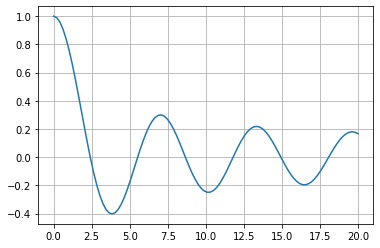

In [4]:
plt.plot(x, f(x))
plt.grid()

Tenemos una función $f(x)$ y queremos encontrar sus raíces, i.e. los valores de $x$ donde $f(x)=0$

# Ceros por Bisección:

Vamos a buscar el primer cero de nuestra función J0 de Bessel.
Elegimos un intervalo dentro del cual queremos encontrar los ceros. Este intervalo será $[a,c]$. Si hay sólamente una raíz en el intervalo, la función evaluada en los dos puntos tendrá signos diferentes, esto es:
$$ \frac{f(a)}{f(c)} < 0 $$
si no hay un cero entre el intervalo entonces

En nuestro ejemplo, $[0,3]$.

Buscamos el punto medio entre $a$ y $c$, lo llamaremos $b$, y evaluamos en cuál de los dos sub-intervalos se mantiene la diferencia de signos:
O bien se cumple $ \frac{f(a)}{f(b)} < 0 $, o bien  $ \frac{f(b)}{f(c)} < 0 $.

(Caso especial, $f(b)=0$, habremos encontrado la raíz y podemos detenernos.)


En el intervalo que se cumpla, repetimos la bisección, e iteramos hasta obtener un error que definiremos como $\epsilon$.

$$| f(b)| < \epsilon$$

## Ejercicio 1

Implemente una función que encuentre los ceros por bisección con $\epsilon = 10^{-6}$. Llámela para encontrar los cinco primeros ceros de la función de Bessel. Compare con los ceros de referencia dados por jn_zeros.

In [5]:
spes.jn_zeros(0, 6)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444, 14.93091771,
       18.07106397])

# Newton-Raphson

Tenemos la función $f(x)$. Estamos parados en un punto inicial $x_0$ cercano a un cero, esto es: $f(x_0)\approx 0$ y vamos a buscar el cero más cercano utilizando la recta tangente que se parezca a la nuestra función.
$$f(x) \approx mx + b$$

En el intercepto de la recta tenemos $$ 0 = m x + b$$
$$ x = -\frac{b}{m}$$


con la pendiente $$ m = \frac{df}{dx} $$

$$ \Delta x = - \frac{f(x_0)}{df/dx}$$

$$ x_{new} = x_0 + \Delta x$$

Usando la derivada que ya veníamos utilizando en la clase magistral

$$ \frac{df}{dx} \approx \frac{f(x+\delta x) - f(x)}{\delta x} $$